# Imports:

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


**Read in the data**

In [2]:
teaching = pd.read_csv('../data/cleaned_teaching_posts.csv')

In [3]:
teaching.head()

,created_utc,title,self_text,subreddit
0,1.697477e+09,Most absurd thing a parent has complained about?,I was just thinking about this so I'll go firs...,teaching
1,1.697558e+09,How do you differentiate for students that can...,"For context, I’m a 5th grade ELA teacher. I ha...",teaching
2,1.697568e+09,How to ask a teacher if I can observe their cl...,Hi yall !! I'm in a 5 year BEd program where w...,teaching
3,1.697489e+09,My TA is constantly being taken to support oth...,I guess I just want to see what other schools ...,teaching
4,1.697502e+09,Dropped out of college trying to be a teacher,TLDR:Dropped out but plan to return eventually...,teaching


In [4]:
teaching.shape

(1420, 4)

In [5]:
mental_health = pd.read_csv('../data/cleaned_mentalhealth_posts.csv')

In [6]:
mental_health.head()

,created_utc,title,self_text,subreddit
0,1.697558e+09,Am I lazy or depressed or anxious or do I just...,I want to start by saying...I do plan on meeti...,mentalhealth
1,1.697553e+09,is puking due to anxiety normal?,"hi, i’ve recently been incredibly anxious and ...",mentalhealth
2,1.697558e+09,why are your 20's so lonely?,I'm a 22F who just moved into my first apartme...,mentalhealth
3,1.697563e+09,How can I fix my social anxiety and meet new p...,I'm in a small town and had bad experiences in...,mentalhealth
4,1.697556e+09,I am becoming the person I always wanted to be...,I have seen myself getting more and more monot...,mentalhealth


In [7]:
mental_health.shape

(1893, 4)

# Compare Title & Post Lengths

**Teaching**

In [8]:
teaching_title_and_text = teaching.drop(columns= ['created_utc', 'subreddit'])

In [9]:
teaching_title_and_text['title_length'] = teaching_title_and_text['title'].apply(len)
teaching_title_and_text['title_word_count'] = teaching_title_and_text['title'].str.split().str.len()

teaching_title_and_text['text_length'] = teaching_title_and_text['self_text'].apply(len)
teaching_title_and_text['text_word_count'] = teaching_title_and_text['self_text'].str.split().str.len()
teaching_title_and_text.head()

,title,self_text,title_length,title_word_count,text_length,text_word_count
0,Most absurd thing a parent has complained about?,I was just thinking about this so I'll go firs...,48,8,951,175
1,How do you differentiate for students that can...,"For context, I’m a 5th grade ELA teacher. I ha...",63,11,595,109
2,How to ask a teacher if I can observe their cl...,Hi yall !! I'm in a 5 year BEd program where w...,82,16,1425,245
3,My TA is constantly being taken to support oth...,I guess I just want to see what other schools ...,88,16,1360,255
4,Dropped out of college trying to be a teacher,TLDR:Dropped out but plan to return eventually...,45,9,4269,831


**Let's take a look at the min and max titles by word count and by text count:**

In [10]:
teaching_title_and_text.sort_values(by='title_word_count').head()

,title,self_text,title_length,title_word_count,text_length,text_word_count
1419,Indoctrination,Im a little confused. As far as I know teacher...,14,1,1036,182
95,Help!,What is teaching and learning for you?,5,1,38,7
1342,Resignation,"Edit: to make this post clear, I did not quit ...",11,1,1337,248
110,Grading,"I teach K-2nd mix class small school, I also ...",7,1,1276,239
565,MiddleSchool,Teaching 7th and 8th grade Dyslexia next year....,12,1,403,77


In [11]:
teaching_title_and_text.sort_values(by='title_word_count', ascending=False).head()

,title,self_text,title_length,title_word_count,text_length,text_word_count
1365,I need advice on how to help my one student of...,This breaks my heart. I love teaching kids abo...,283,59,1680,308
1060,I make free printable posters for parents and ...,&#x200B;\r\rhttps://preview.redd.it/5u1w3ubrg2...,297,55,127,2
1073,After a student broke my thumb (preschool) my ...,"Sweet, sweet relief. Teachers, if you're in a ...",261,52,355,65
322,Teachers - Today’s math/physics real world que...,I always like to give my students real world q...,268,50,124,22
950,SCHOOL CLOSED? Looking for Art lessons to do a...,[www.mrsbrown.art/drive](www.mrsbrown.art/drive),294,50,48,1


> _The longest title had 59 words in it and the shortest title had 1 word in it_

In [12]:
teaching_title_and_text.sort_values(by='text_word_count').head()

,title,self_text,title_length,title_word_count,text_length,text_word_count
1203,What’s something people wouldn’t understand un...,Title,71,10,5,1
992,Admins are now bribing parents to send their k...,🤦‍♀️,59,11,4,1
950,SCHOOL CLOSED? Looking for Art lessons to do a...,[www.mrsbrown.art/drive](www.mrsbrown.art/drive),294,50,48,1
548,"Elementary teachers, what makes teaching eleme...",Title,74,9,6,1
324,Has anyone ever incorporated video games into ...,Title,69,10,5,1


In [13]:
teaching_title_and_text.sort_values(by='text_word_count', ascending=False).head()

,title,self_text,title_length,title_word_count,text_length,text_word_count
629,One Bad Day,For flairs I said vent but help may be good as...,11,3,7326,1403
1299,With so many classes being remote I wanted to ...,**What is this?**\r\rThese are apps (really we...,111,22,6919,1123
457,I don’t ever want to teach again.,Throwaway because this is so specific.\r\rI (2...,33,7,5959,1069
988,My principal yelled at me in front of my stude...,I cried at work today in front of my students ...,82,17,5457,1038
1397,"Working at a boarding school: what it’s like, ...",I work at a boarding school in Massachusetts. ...,87,16,5597,1036


> _The longest text had 1,403 words in it and the shortest title had 1 word in it_

In [14]:
teaching_title_and_text['title_length'].mean()

49.40633802816902

In [15]:
teaching_title_and_text['title_word_count'].mean()

8.66056338028169

In [16]:
teaching_title_and_text['text_length'].mean()

867.8429577464789

In [17]:
teaching_title_and_text['text_word_count'].mean()

157.743661971831

**Let's take a look at visuals to show the distributions of title and text lengths by word count and length:**

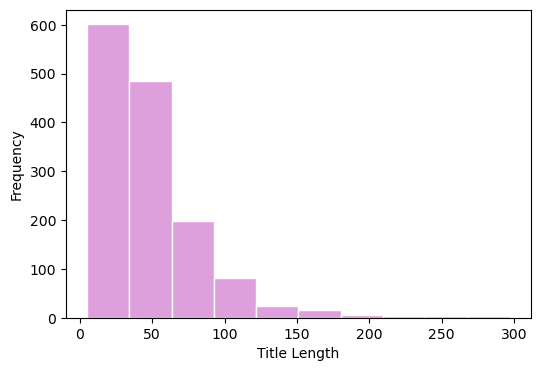

In [18]:
plt.figure(figsize= (6,4))
plt.hist(teaching_title_and_text['title_length'], bins = 10, color = 'plum', edgecolor = 'white')
plt.xlabel('Title Length')
plt.ylabel('Frequency');

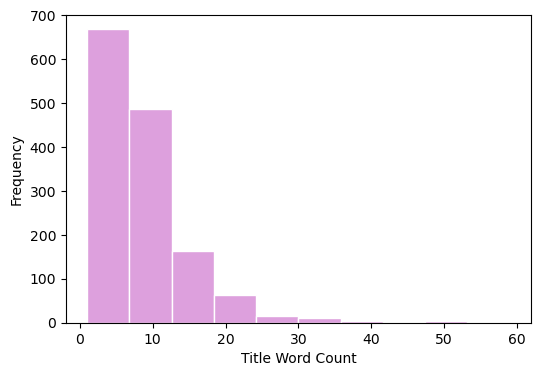

In [19]:
plt.figure(figsize= (6,4))
plt.hist(teaching_title_and_text['title_word_count'], bins = 10, color = 'plum', edgecolor = 'white')
plt.xlabel('Title Word Count')
plt.ylabel('Frequency');

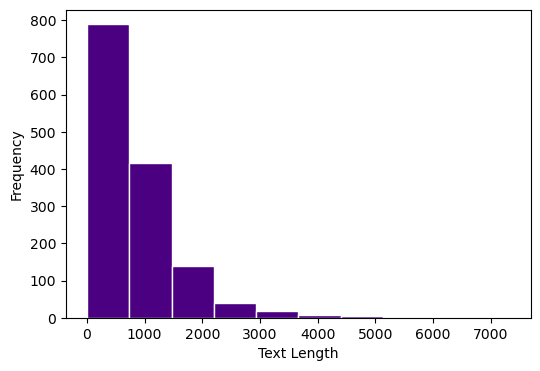

In [20]:
plt.figure(figsize= (6,4))
plt.hist(teaching_title_and_text['text_length'], bins = 10, color = 'indigo', edgecolor = 'white')
plt.xlabel('Text Length')
plt.ylabel('Frequency');

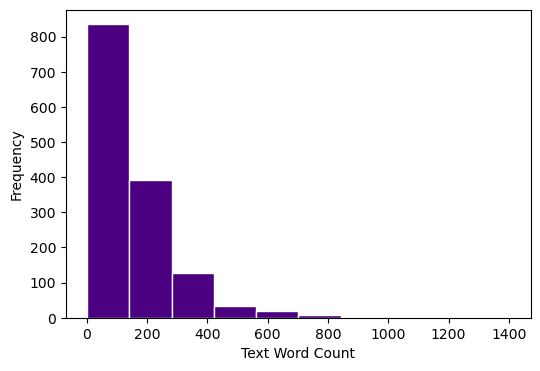

In [21]:
plt.figure(figsize= (6,4))
plt.hist(teaching_title_and_text['text_word_count'], bins = 10, color = 'indigo', edgecolor = 'white')
plt.xlabel('Text Word Count')
plt.ylabel('Frequency');

>_All 4 of the ditributions above are scewed right, meaning that longer titles/texts are not the majority._

**Mental Health**

In [22]:
mental_health_title_and_text = mental_health.drop(columns= ['created_utc', 'subreddit'])

In [23]:
mental_health_title_and_text['title_length'] = mental_health_title_and_text['title'].apply(len)
mental_health_title_and_text['title_word_count'] = mental_health_title_and_text['title'].str.split().str.len()

mental_health_title_and_text['text_length'] = mental_health_title_and_text['self_text'].apply(len)
mental_health_title_and_text['text_word_count'] = mental_health_title_and_text['self_text'].str.split().str.len()
mental_health_title_and_text.head()

,title,self_text,title_length,title_word_count,text_length,text_word_count
0,Am I lazy or depressed or anxious or do I just...,I want to start by saying...I do plan on meeti...,62,14,2906,578
1,is puking due to anxiety normal?,"hi, i’ve recently been incredibly anxious and ...",32,6,534,97
2,why are your 20's so lonely?,I'm a 22F who just moved into my first apartme...,28,6,1955,381
3,How can I fix my social anxiety and meet new p...,I'm in a small town and had bad experiences in...,57,12,511,105
4,I am becoming the person I always wanted to be...,I have seen myself getting more and more monot...,64,14,714,147


**Let's take a look at the min and max titles by word count and by text count:**

In [24]:
mental_health_title_and_text.sort_values(by='title_word_count').head()

,title,self_text,title_length,title_word_count,text_length,text_word_count
554,Struggling,I am a university student. I have always studi...,10,1,521,102
154,Depression,I have absolutely no fight left. Nothing makes...,10,1,159,32
1766,Ya,Shout out to all my fellow ppl who are fightin...,2,1,103,20
1858,progress,"last night instead of self harming, I drew on ...",8,1,516,105
1336,Shocked,Ya'll. I am a therapist myself and have been s...,7,1,497,94


In [25]:
mental_health_title_and_text.sort_values(by='title_word_count', ascending=False).head()

,title,self_text,title_length,title_word_count,text_length,text_word_count
1683,I wanted to say a massive “THANK YOU” for all ...,Just thank you for being an awesome community....,285,56,682,131
898,I think of my problem is I try to make my brai...,Should I think about other things and acknowle...,268,56,72,12
296,"I tried to explore, grow, cope up but I think ...",Imnotaloneright?,266,55,16,1
1123,"I wish family members would STOP saying ""Every...",Just can't stand every little thing they say t...,295,54,1419,263
1183,I’m a cancer patient. I’m done with chemo. My ...,Everything’s going well and getting better! I ...,296,54,939,179


> _The longest title had 56 words in it and the shortest title had 1 word in it_

In [26]:
mental_health_title_and_text.sort_values(by='text_word_count').head()

,title,self_text,title_length,title_word_count,text_length,text_word_count
1386,"I wanna go home, but I’m already home.",.,38,8,1,1
296,"I tried to explore, grow, cope up but I think ...",Imnotaloneright?,266,55,16,1
856,Sharing my energy,[https://www.reddit.com/user/BusHelpful6163/co...,17,3,279,1
1101,"I don’t want to kill myself, but I wouldn’t be...",.,119,26,1,1
835,Talk to me I got you <3,https://www.reddit.com/user/BusHelpful6163/com...,23,7,68,1


In [27]:
mental_health_title_and_text.sort_values(by='text_word_count', ascending=False).head()

,title,self_text,title_length,title_word_count,text_length,text_word_count
1458,"If you were abused or felt unloved, unwanted, ...",This is for anyone who was abused as a child. ...,101,18,11809,2253
454,i really want to do something silly,TW: SH\r \n\r \nthis i so long im really sor...,35,7,10570,2187
623,"Just complex trauma, or something else?","*CW* Abuse, CW drugs, CW Sex abuse, CW \nVenti...",39,6,13003,2144
585,My fear and resistance to taking medication fo...,This is a long post not just about my fear of ...,122,19,9808,1775
329,"Mental Health Relapse. Any advice, support or ...",I've posted here before to try and put what I'...,59,8,8986,1697


> _The longest text had 2,253 words in it and the shortest title had 1 word in it_

In [28]:
mental_health_title_and_text['title_length'].mean()

56.296883254094034

In [29]:
mental_health_title_and_text['title_word_count'].mean()

10.561014263074485

In [30]:
mental_health_title_and_text['text_length'].mean()

1023.0322239830956

In [31]:
mental_health_title_and_text['text_word_count'].mean()

194.9809825673534

**Let's take a look at visuals to show the distributions of title and text lengths by word count and length:**

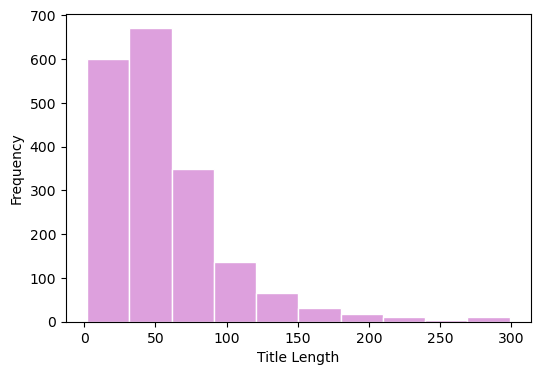

In [32]:
plt.figure(figsize= (6,4))
plt.hist(mental_health_title_and_text['title_length'], bins = 10, color = 'plum', edgecolor = 'white')
plt.xlabel('Title Length')
plt.ylabel('Frequency');

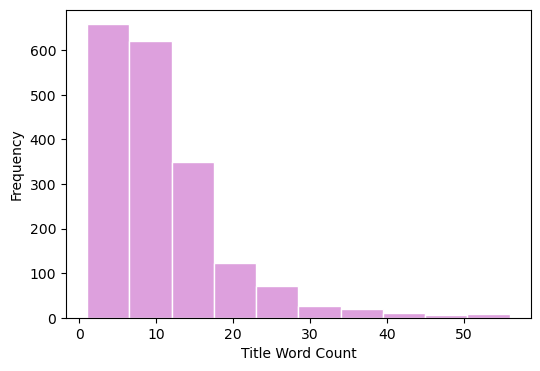

In [33]:
plt.figure(figsize= (6,4))
plt.hist(mental_health_title_and_text['title_word_count'], bins = 10, color = 'plum', edgecolor = 'white')
plt.xlabel('Title Word Count')
plt.ylabel('Frequency');

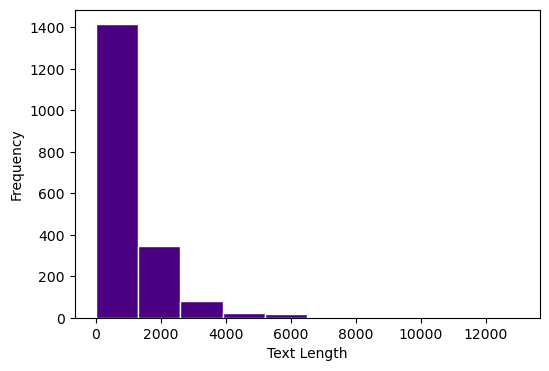

In [34]:
plt.figure(figsize= (6,4))
plt.hist(mental_health_title_and_text['text_length'], bins = 10, color = 'indigo', edgecolor = 'white')
plt.xlabel('Text Length')
plt.ylabel('Frequency');

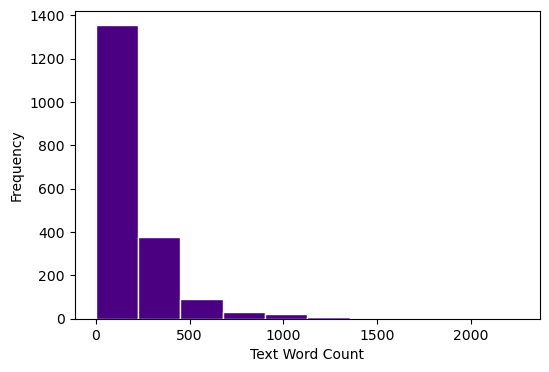

In [35]:
plt.figure(figsize= (6,4))
plt.hist(mental_health_title_and_text['text_word_count'], bins = 10, color = 'indigo', edgecolor = 'white')
plt.xlabel('Text Word Count')
plt.ylabel('Frequency');

>_Similar to teaching, all 4 of the ditributions above are scewed right, meaning that longer titles/texts are not the majority._

# Compare Common Words

Let's visualize the most common words from both data sets and see compare the two. I am going to use CountVectorizer on both data sets to convert the text into a more structured df for EDA.  

### Comparing Common Words in Title:

**Teaching**

In [36]:
teaching.head(1)

,created_utc,title,self_text,subreddit
0,1.697477e+09,Most absurd thing a parent has complained about?,I was just thinking about this so I'll go firs...,teaching


In [37]:
X = teaching['title']

In [38]:
cv = CountVectorizer(stop_words = 'english')
cv.fit(X)

CountVectorizer(stop_words='english')

In [39]:
X = cv.transform(X)

In [40]:
X_df = pd.DataFrame(X.todense(), columns=cv.get_feature_names_out())
X_df.head()

,10,100,10th,11,1100,12,128k,12th,13,14,...,yes,yesterday,yo,young,younger,yuppie,zealand,zedong,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


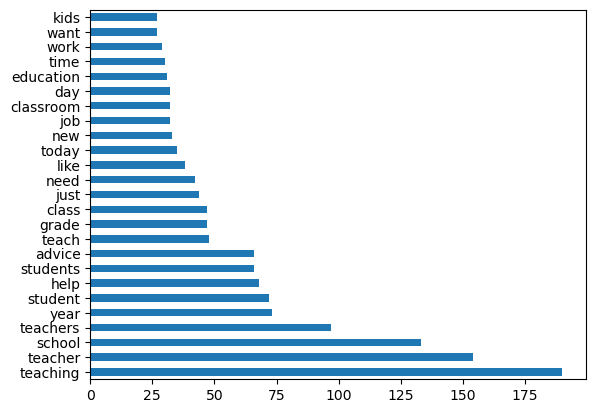

In [41]:
X_df.sum().sort_values(ascending = False).head(25).plot(kind = 'barh');

**Mental Health**

In [42]:
mental_health.head(1)

,created_utc,title,self_text,subreddit
0,1.697558e+09,Am I lazy or depressed or anxious or do I just...,I want to start by saying...I do plan on meeti...,mentalhealth


In [43]:
X = mental_health['title']

In [44]:
cv = CountVectorizer(stop_words = 'english')
cv.fit(X)

CountVectorizer(stop_words='english')

In [45]:
X = cv.transform(X)

In [46]:
X_df = pd.DataFrame(X.todense(), columns=cv.get_feature_names_out())
X_df.head()

,000,10,100,1000,10mg,12,125,13,13yo,14,...,young,younger,youre,youth,youtube,yoy,yr,zero,zoom,zyprexa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


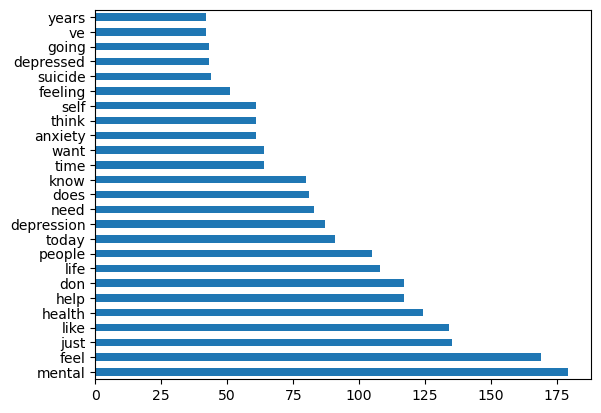

In [47]:
X_df.sum().sort_values(ascending = False).head(25).plot(kind = 'barh');

### Comparing Common Words in Self-text:

**Teaching**

In [48]:
X = teaching['self_text']

In [49]:
cv = CountVectorizer(stop_words = 'english')
cv.fit(X)

CountVectorizer(stop_words='english')

In [50]:
X = cv.transform(X)

In [51]:
X_df = pd.DataFrame(X.todense(), columns=cv.get_feature_names_out())
X_df.head()

,00,000,002,00am,00pm,03,05,07dfdspoyos,08,0a,...,zeros,zipper,zone,zoo,zoom,zoomed,zooming,zooms,ƨⴇяawʞɔa𐐺,ㅠㅠ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


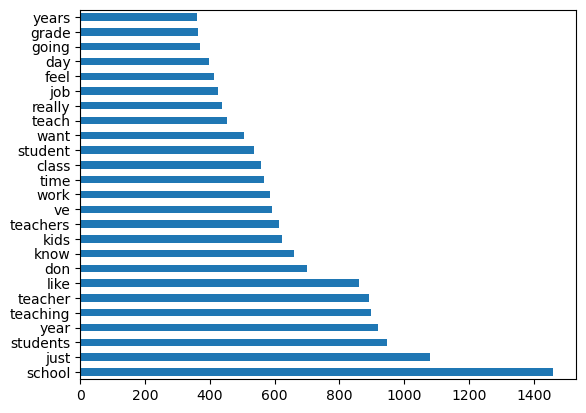

In [52]:
X_df.sum().sort_values(ascending = False).head(25).plot(kind = 'barh');

**Mental Health**

In [53]:
X = mental_health['self_text']

In [54]:
cv = CountVectorizer(stop_words = 'english')
cv.fit(X)

CountVectorizer(stop_words='english')

In [55]:
X = cv.transform(X)

In [56]:
X_df = pd.DataFrame(X.todense(), columns=cv.get_feature_names_out())
X_df.head()

,00,000,0000,0063,00am,00pm,018,0451529065,05,07,...,zotwpuq,zyprexa,ıf,𝘼𝙉𝙓𝙄𝙀𝙏𝙔,𝙍𝙀𝙇𝙄𝙀𝙁,𝙘𝙧𝙖𝙘𝙠,𝙥𝙧𝙚𝙨𝙨𝙪𝙧𝙚,𝙪𝙣𝙙𝙚𝙧,𝙬𝙚,𝙬𝙝𝙮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


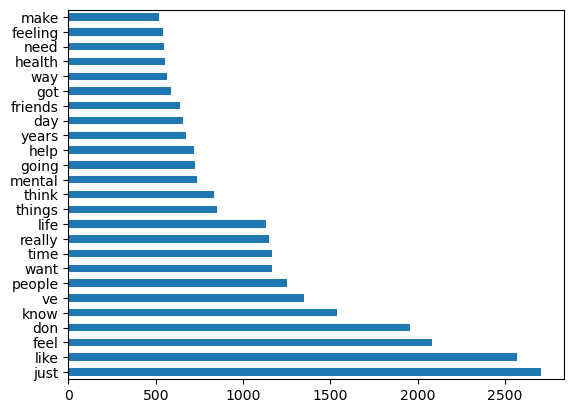

In [57]:
X_df.sum().sort_values(ascending = False).head(25).plot(kind = 'barh');

I am curious what would happen if we remove the "teacher" language from teaching? What would the most common words be then?

**Teaching Title**

In [58]:
X = teaching['title']

cv = CountVectorizer(stop_words=['kids', 'teaching', 'teacher', 'school', 'student', 'students', 'teach', 'classroom', 'education'])
cv.fit(X)

X = cv.transform(X)

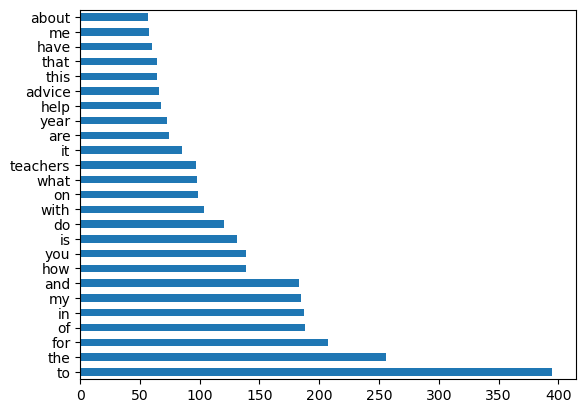

In [59]:
X_df = pd.DataFrame(X.todense(), columns=cv.get_feature_names_out())
X_df.sum().sort_values(ascending = False).head(25).plot(kind = 'barh');

Unhelpful...

### Let's use tfid...

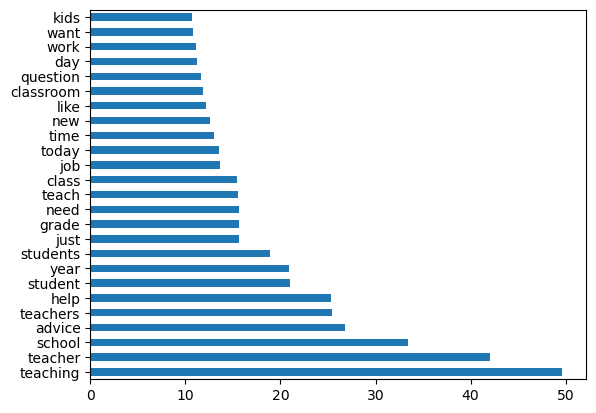

In [62]:
X = teaching['title']

tvec = TfidfVectorizer(stop_words = "english")

tvec.fit(X)

X = tvec.transform(X)


X_df = pd.DataFrame(X.todense(), columns=tvec.get_feature_names_out())
X_df.sum().sort_values(ascending = False).head(25).plot(kind = 'barh');

> Same as cv

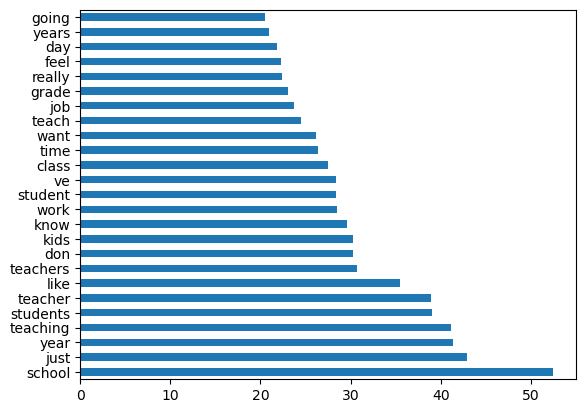

In [63]:
X = teaching['self_text']

tvec = TfidfVectorizer(stop_words = "english")

tvec.fit(X)

X = tvec.transform(X)


X_df = pd.DataFrame(X.todense(), columns=tvec.get_feature_names_out())
X_df.sum().sort_values(ascending = False).head(25).plot(kind = 'barh');

> Slightly different from cv

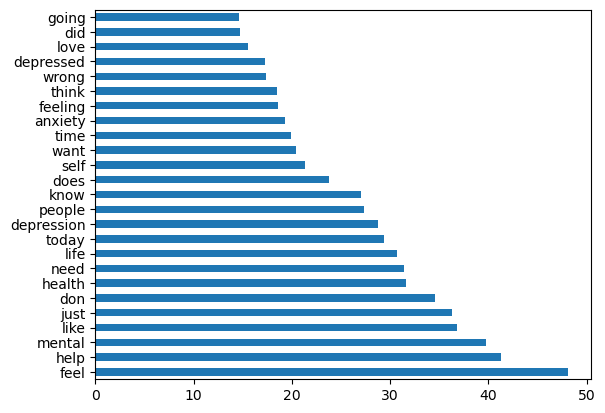

In [64]:
X = mental_health['title']

tvec = TfidfVectorizer(stop_words = "english")

tvec.fit(X)

X = tvec.transform(X)


X_df = pd.DataFrame(X.todense(), columns=tvec.get_feature_names_out())
X_df.sum().sort_values(ascending = False).head(25).plot(kind = 'barh');

> Different than cv

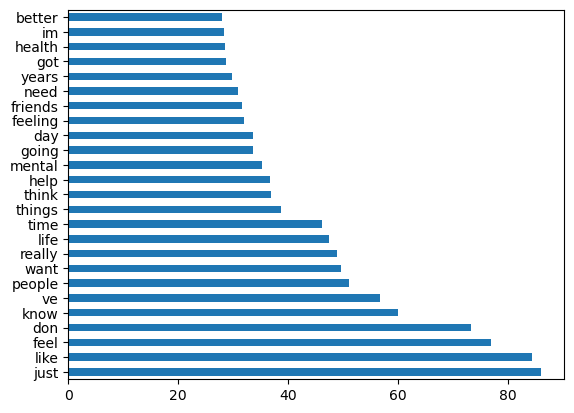

In [65]:
X = mental_health['self_text']

tvec = TfidfVectorizer(stop_words = "english")

tvec.fit(X)

X = tvec.transform(X)


X_df = pd.DataFrame(X.todense(), columns=tvec.get_feature_names_out())
X_df.sum().sort_values(ascending = False).head(25).plot(kind = 'barh');

> Slightly different than cv

# Compare bi & tri-grams:

**Bi-grams**

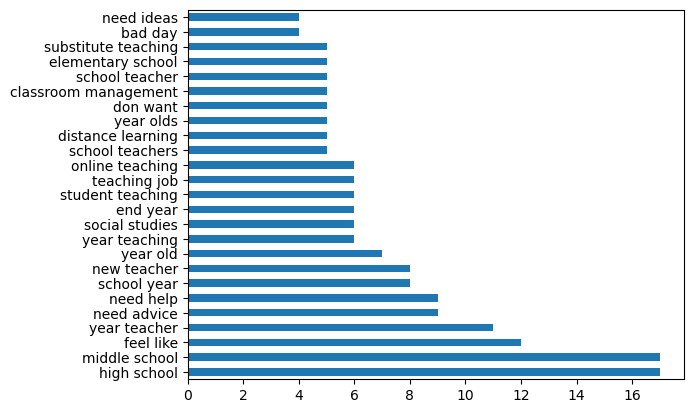

In [505]:
X = teaching['title']

cvec = CountVectorizer(stop_words = 'english', ngram_range = (2,2))
cvec.fit(X)


X = cvec.transform(X)
X_df = pd.DataFrame(X.todense(), columns=cvec.get_feature_names_out())

X_df.sum().sort_values(ascending = False).head(25).plot(kind = 'barh');


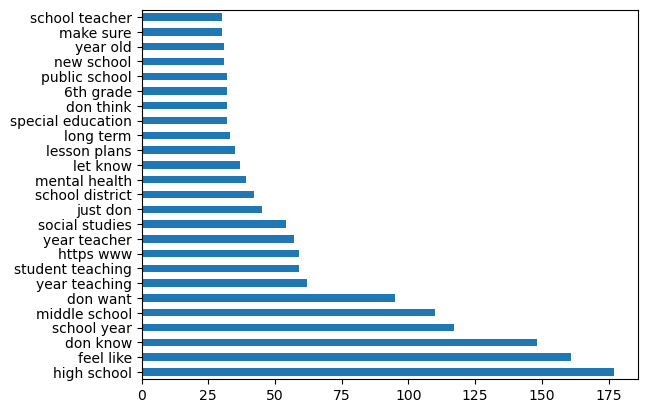

In [506]:
X = teaching['self_text']

cvec = CountVectorizer(stop_words = 'english', ngram_range = (2,2))
cvec.fit(X)


X = cvec.transform(X)
X_df = pd.DataFrame(X.todense(), columns=cvec.get_feature_names_out())

X_df.sum().sort_values(ascending = False).head(25).plot(kind = 'barh');


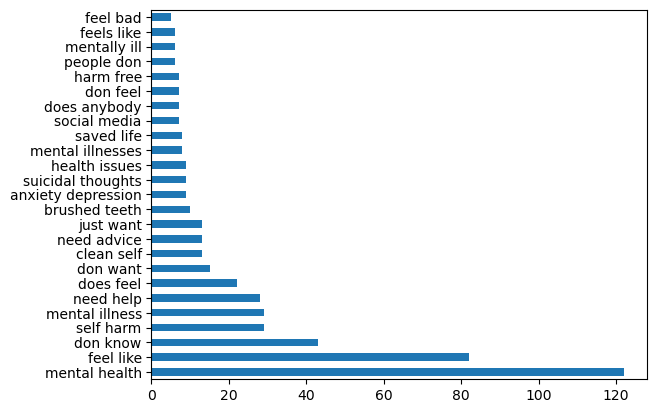

In [507]:
X = mental_health['title']

cvec = CountVectorizer(stop_words = 'english', ngram_range = (2,2))
cvec.fit(X)


X = cvec.transform(X)
X_df = pd.DataFrame(X.todense(), columns=cvec.get_feature_names_out())

X_df.sum().sort_values(ascending = False).head(25).plot(kind = 'barh');


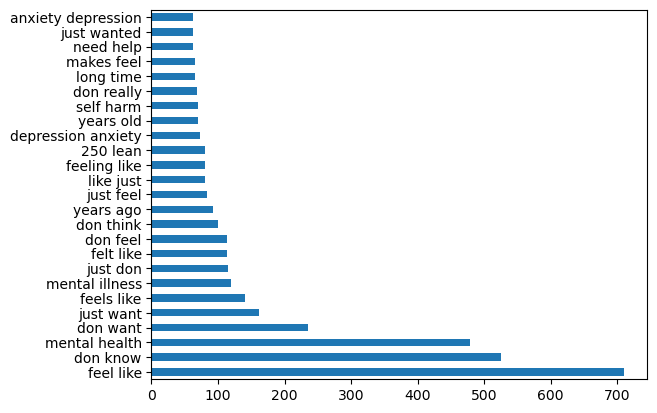

In [508]:
X = mental_health['self_text']

cvec = CountVectorizer(stop_words = 'english', ngram_range = (2,2))
cvec.fit(X)


X = cvec.transform(X)
X_df = pd.DataFrame(X.todense(), columns=cvec.get_feature_names_out())

X_df.sum().sort_values(ascending = False).head(25).plot(kind = 'barh');


**Tri-grams**

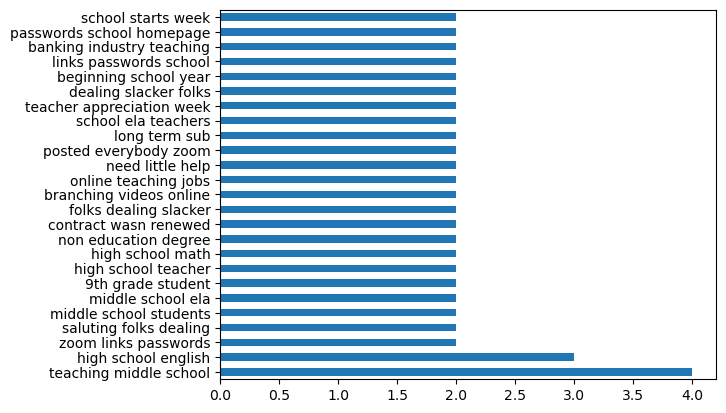

In [516]:
X = teaching['title']

cvec = CountVectorizer(stop_words = 'english', ngram_range = (3,3))
cvec.fit(X)


X = cvec.transform(X)
X_df = pd.DataFrame(X.todense(), columns=cvec.get_feature_names_out())

X_df.sum().sort_values(ascending = False).head(25).plot(kind = 'barh');


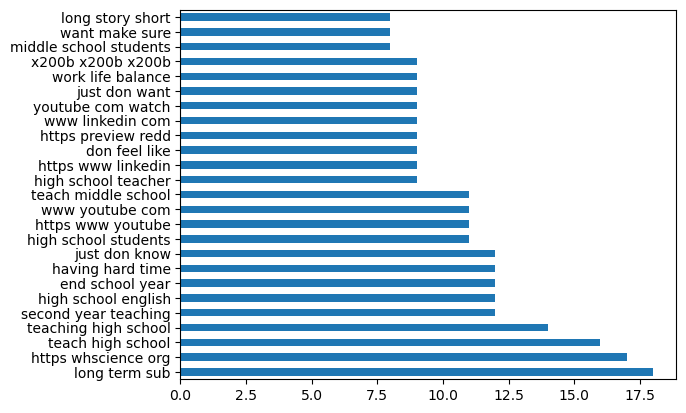

In [517]:
X = teaching['self_text']

cvec = CountVectorizer(stop_words = 'english', ngram_range = (3,3))
cvec.fit(X)


X = cvec.transform(X)
X_df = pd.DataFrame(X.todense(), columns=cvec.get_feature_names_out())

X_df.sum().sort_values(ascending = False).head(25).plot(kind = 'barh');


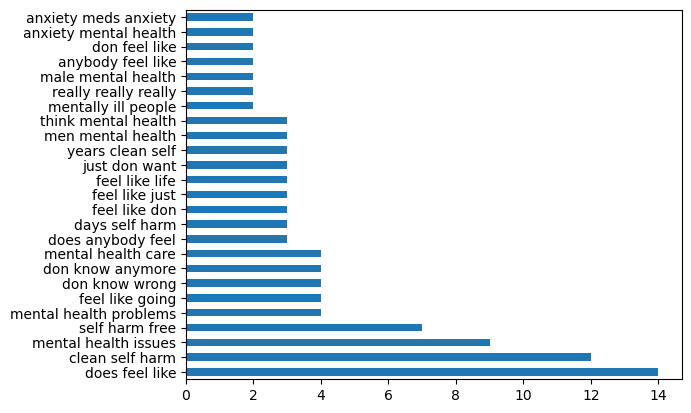

In [511]:
X = mental_health['title']

cvec = CountVectorizer(stop_words = 'english', ngram_range = (3,3))
cvec.fit(X)


X = cvec.transform(X)
X_df = pd.DataFrame(X.todense(), columns=cvec.get_feature_names_out())

X_df.sum().sort_values(ascending = False).head(25).plot(kind = 'barh');


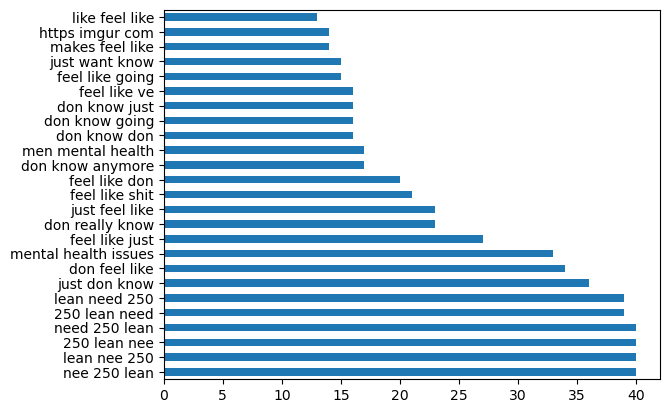

In [512]:
X = mental_health['self_text']

cvec = CountVectorizer(stop_words = 'english', ngram_range = (3,3))
cvec.fit(X)


X = cvec.transform(X)
X_df = pd.DataFrame(X.todense(), columns=cvec.get_feature_names_out())

X_df.sum().sort_values(ascending = False).head(25).plot(kind = 'barh');


# Compare Sentiment Analysis

### Comparing Sentiment in Titles and Self_text:

**Teaching**

In [408]:
sa = SentimentIntensityAnalyzer()

In [475]:
teaching['sentiment_title_pos'] = teaching.title.apply(lambda r: sa.polarity_scores(r)['pos'])
teaching['sentiment_text_pos'] = teaching.self_text.apply(lambda r: sa.polarity_scores(r)['pos'])

In [476]:
teaching.head()

,created_utc,title,self_text,subreddit,sentiment_title_pos,sentiment_text_pos
0,1.697477e+09,Most absurd thing a parent has complained about?,I was just thinking about this so I'll go firs...,teaching,0.000,0.017
1,1.697558e+09,How do you differentiate for students that can...,"For context, I’m a 5th grade ELA teacher. I ha...",teaching,0.000,0.034
2,1.697568e+09,How to ask a teacher if I can observe their cl...,Hi yall !! I'm in a 5 year BEd program where w...,teaching,0.000,0.048
3,1.697489e+09,My TA is constantly being taken to support oth...,I guess I just want to see what other schools ...,teaching,0.157,0.081
4,1.697502e+09,Dropped out of college trying to be a teacher,TLDR:Dropped out but plan to return eventually...,teaching,0.000,0.102


In [477]:
print(teaching['sentiment_title_pos'].mean())
print(teaching['sentiment_text_pos'].mean())

0.08571619718309859
0.10794929577464789


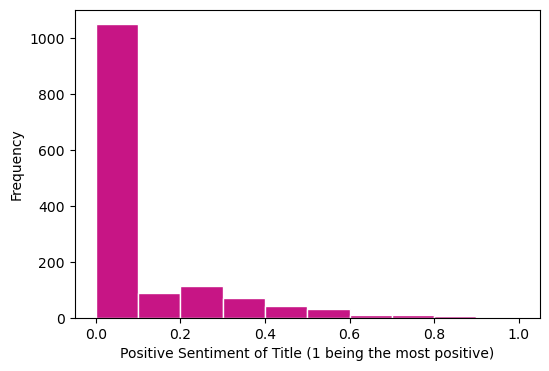

In [478]:
plt.figure(figsize= (6,4))
plt.hist(teaching['sentiment_title_pos'], bins = 10, color = 'mediumvioletred', edgecolor = 'white')
plt.xlabel('Positive Sentiment of Title (1 being the most positive)')
plt.ylabel('Frequency');

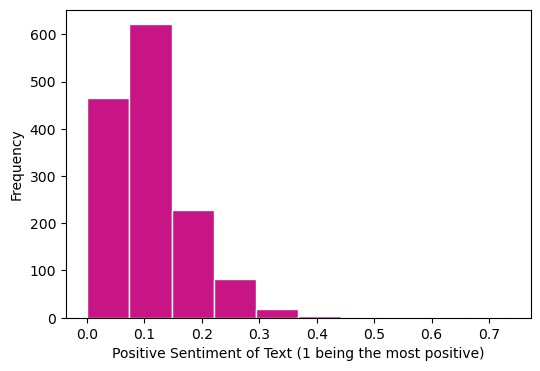

In [479]:
plt.figure(figsize= (6,4))
plt.hist(teaching['sentiment_text_pos'], bins = 10, color = 'mediumvioletred', edgecolor = 'white')
plt.xlabel('Positive Sentiment of Text (1 being the most positive)')
plt.ylabel('Frequency');

In [480]:
mental_health['sentiment_title_pos'] = mental_health.title.apply(lambda r: sa.polarity_scores(r)['pos'])
mental_health['sentiment_text_pos'] = mental_health.self_text.apply(lambda r: sa.polarity_scores(r)['pos'])

In [481]:
mental_health.head()

,created_utc,title,self_text,subreddit,sentiment_title_pos,sentiment_text_pos
0,1.697558e+09,Am I lazy or depressed or anxious or do I just...,I want to start by saying...I do plan on meeti...,mentalhealth,0.0,0.121
1,1.697553e+09,is puking due to anxiety normal?,"hi, i’ve recently been incredibly anxious and ...",mentalhealth,0.0,0.000
2,1.697558e+09,why are your 20's so lonely?,I'm a 22F who just moved into my first apartme...,mentalhealth,0.0,0.065
3,1.697563e+09,How can I fix my social anxiety and meet new p...,I'm in a small town and had bad experiences in...,mentalhealth,0.0,0.053
4,1.697556e+09,I am becoming the person I always wanted to be...,I have seen myself getting more and more monot...,mentalhealth,0.0,0.152


In [482]:
print(mental_health['sentiment_title_pos'].mean())
print(mental_health['sentiment_text_pos'].mean())

0.12878763866877974
0.1406296883254094


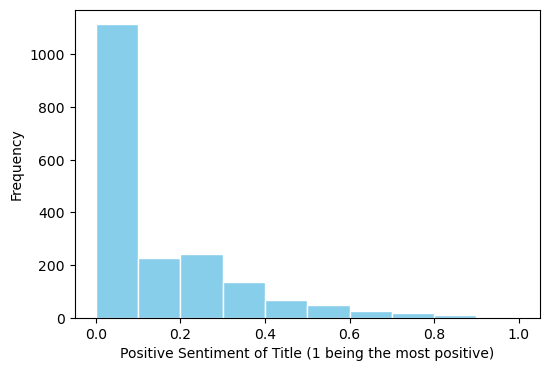

In [483]:
plt.figure(figsize= (6,4))
plt.hist(mental_health['sentiment_title_pos'], bins = 10, color = 'skyblue', edgecolor = 'white')
plt.xlabel('Positive Sentiment of Title (1 being the most positive)')
plt.ylabel('Frequency');

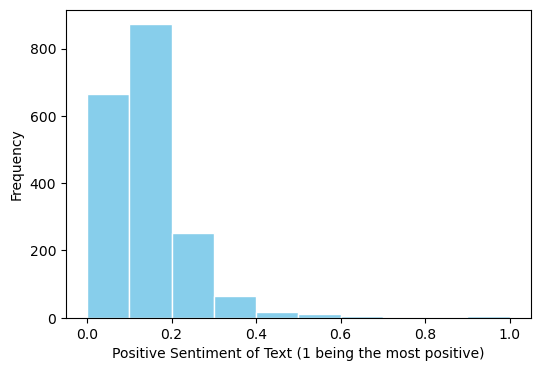

In [484]:
plt.figure(figsize= (6,4))
plt.hist(mental_health['sentiment_text_pos'], bins = 10, color = 'skyblue', edgecolor = 'white')
plt.xlabel('Positive Sentiment of Text (1 being the most positive)')
plt.ylabel('Frequency');

In [485]:
teaching['sentiment_title_compound'] = teaching.title.apply(lambda r: sa.polarity_scores(r)['compound'])
teaching['sentiment_text_compound'] = teaching.self_text.apply(lambda r: sa.polarity_scores(r)['compound'])

mental_health['sentiment_title_compound'] = mental_health.title.apply(lambda r: sa.polarity_scores(r)['compound'])
mental_health['sentiment_text_compound'] = mental_health.self_text.apply(lambda r: sa.polarity_scores(r)['compound'])

In [486]:
print(teaching['sentiment_title_compound'].mean())
print(teaching['sentiment_text_compound'].mean())

print(mental_health['sentiment_title_compound'].mean())
print(mental_health['sentiment_text_compound'].mean())

0.00915549295774648
0.313248661971831
-0.08286455361859482
-0.029222345483359734
